# Prepare a model for glass classification using KNN


In [63]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
# Loading dataset
data = pd.read_csv('glass.csv')

### EDA & Data preprocessing

In [65]:
data.shape

(214, 10)

In [66]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [67]:
data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
17,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.00,2
76,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,3


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [69]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [70]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### There  are no null values on dataset

In [71]:
# Checking how many types of glass are present in dataset
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### There are 6 types of glass present in dataset and glass 1 & 2 have higher no of values

# Data visualization

<Axes: xlabel='Type', ylabel='count'>

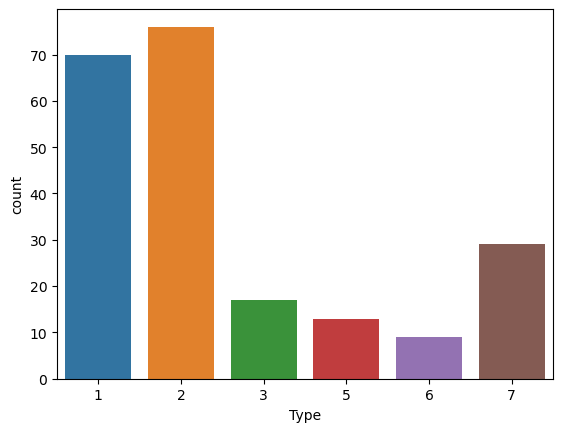

In [72]:
sns.countplot(x = 'Type', data = data)

<Axes: >

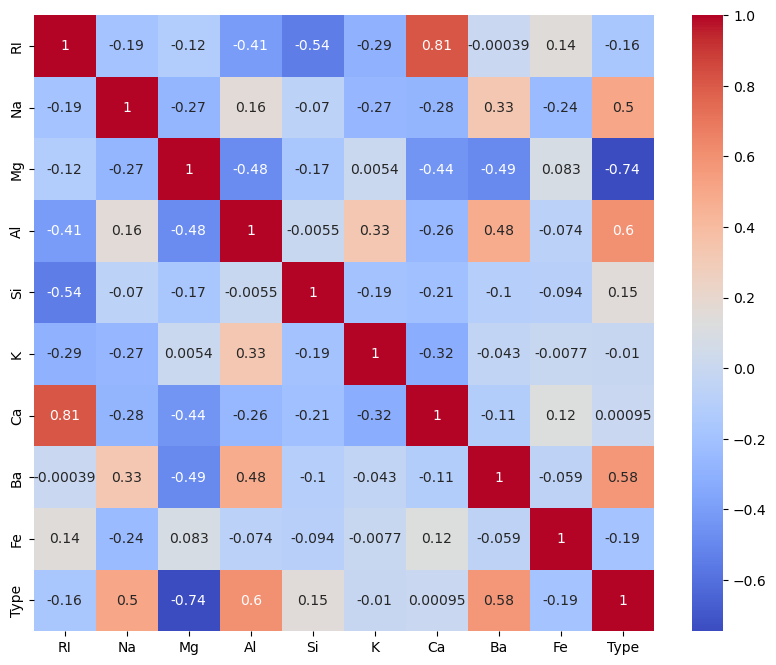

In [73]:
# Correlation heat map to see the relation between different parameters
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

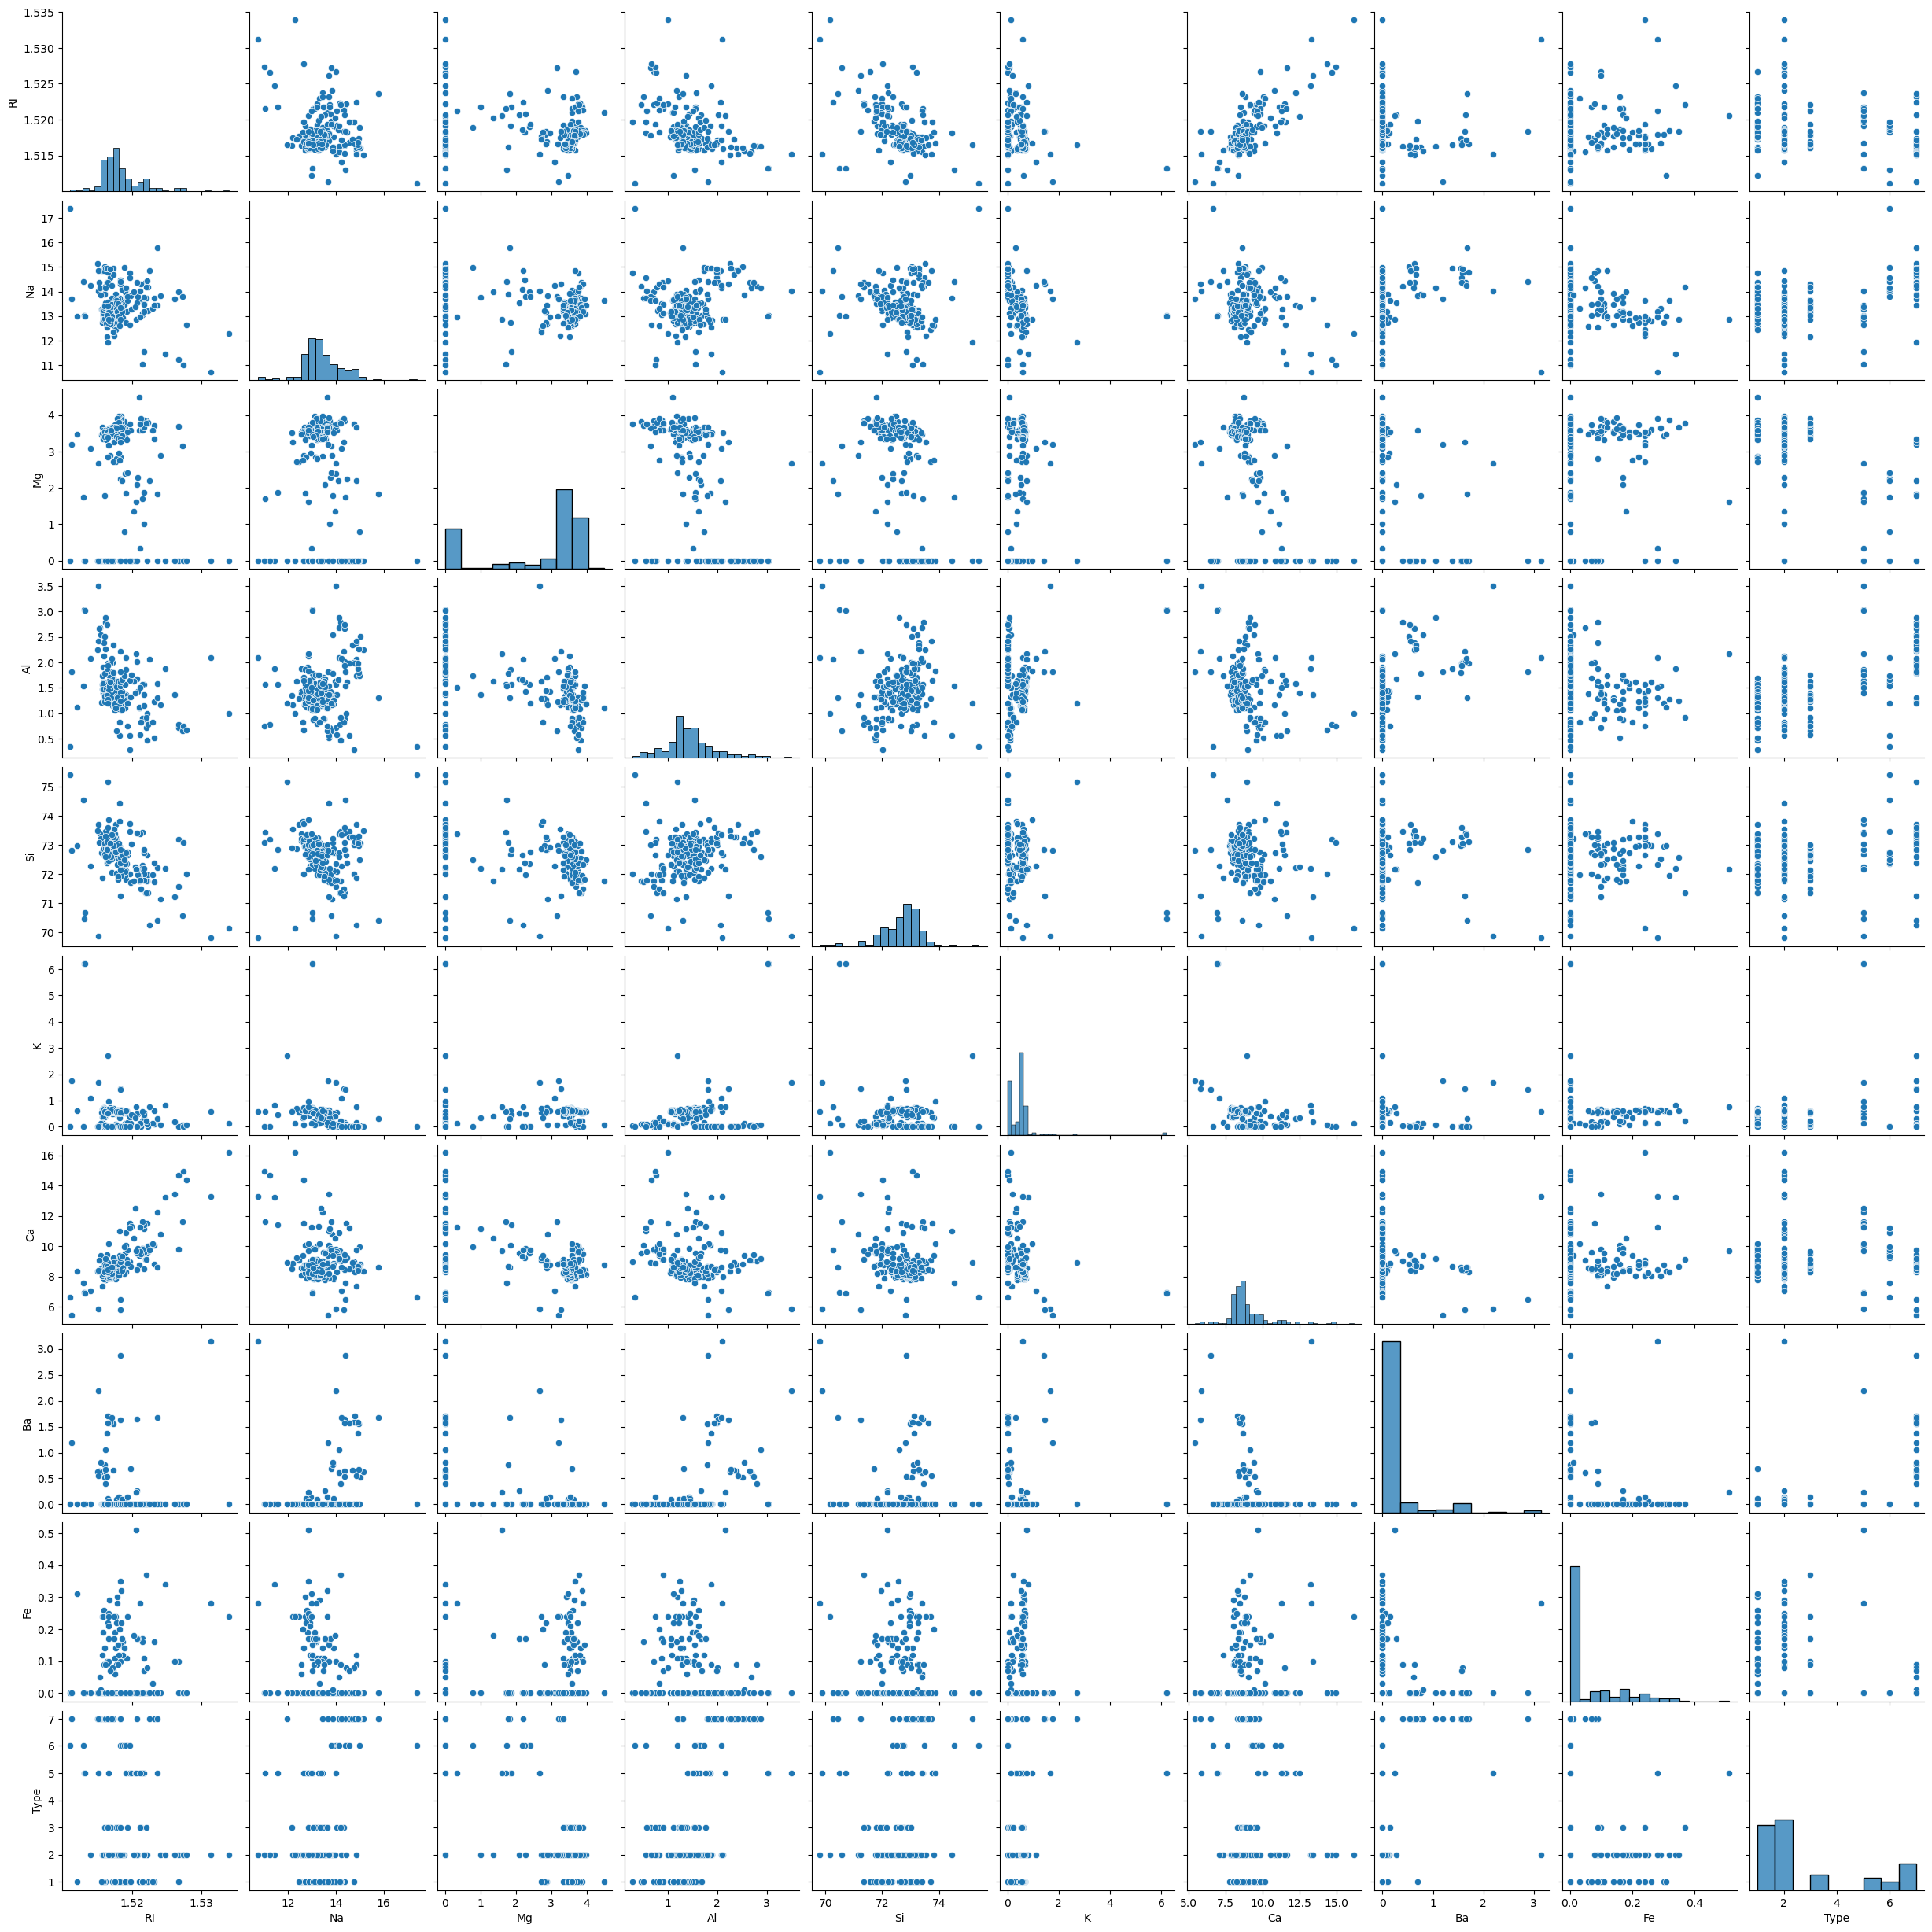

In [74]:
# plotting pairplot
sns.pairplot(data)

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\3066154151.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


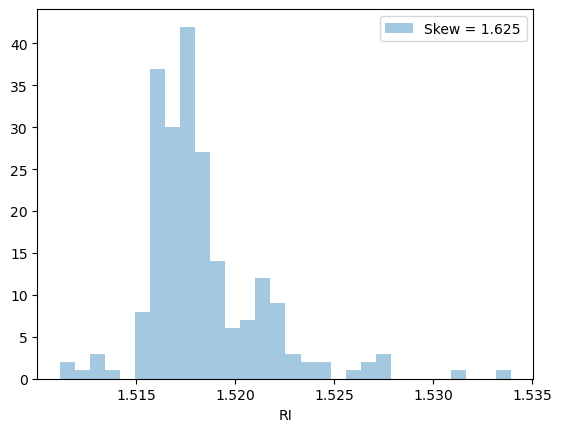

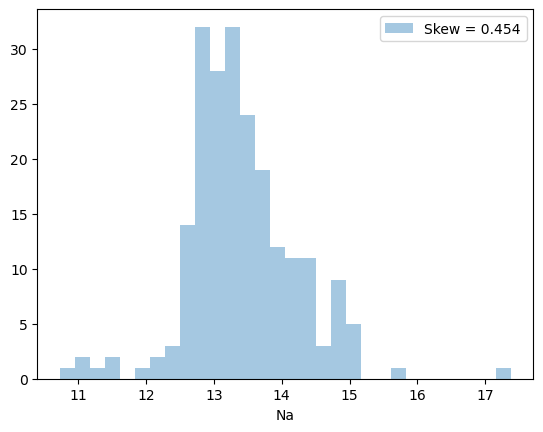

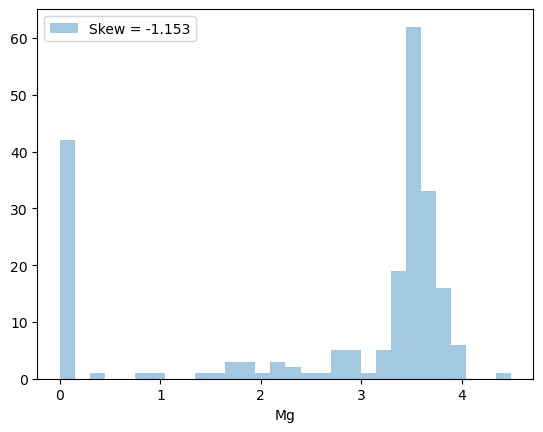

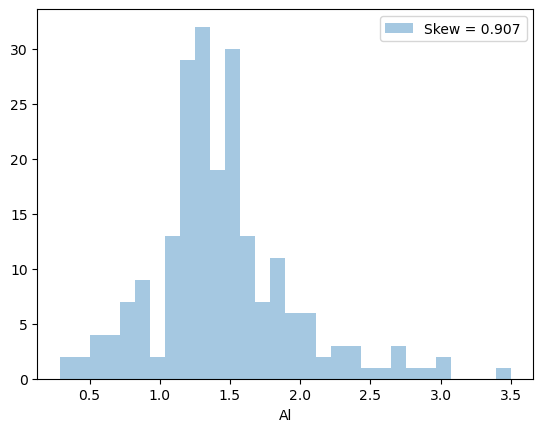

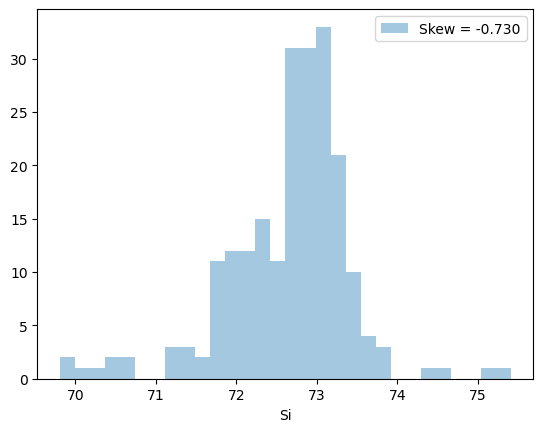

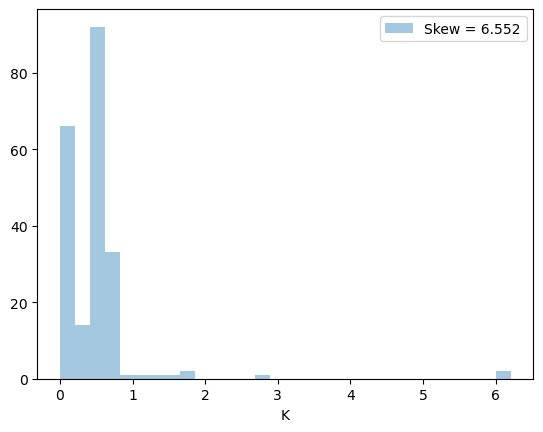

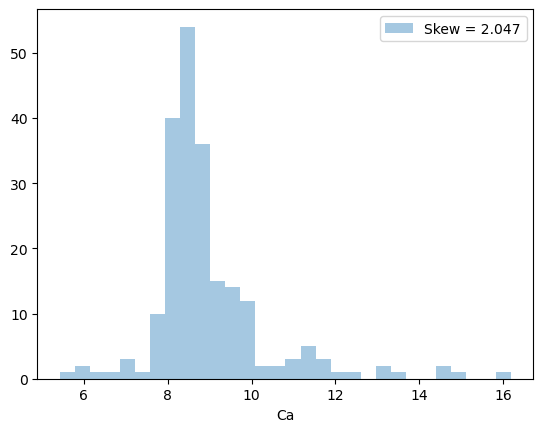

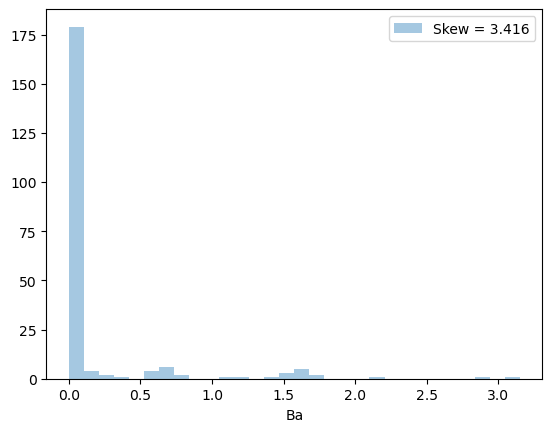

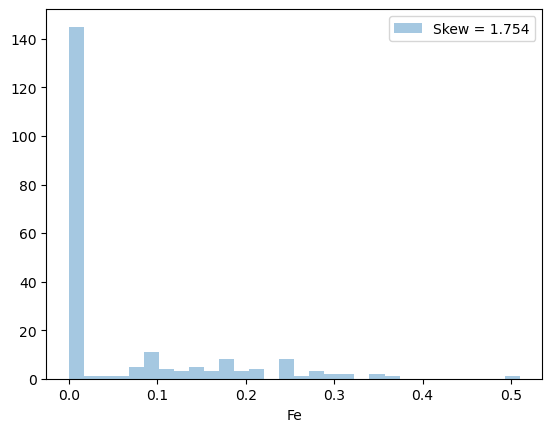

In [75]:
features = data.columns[:-1].tolist()
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

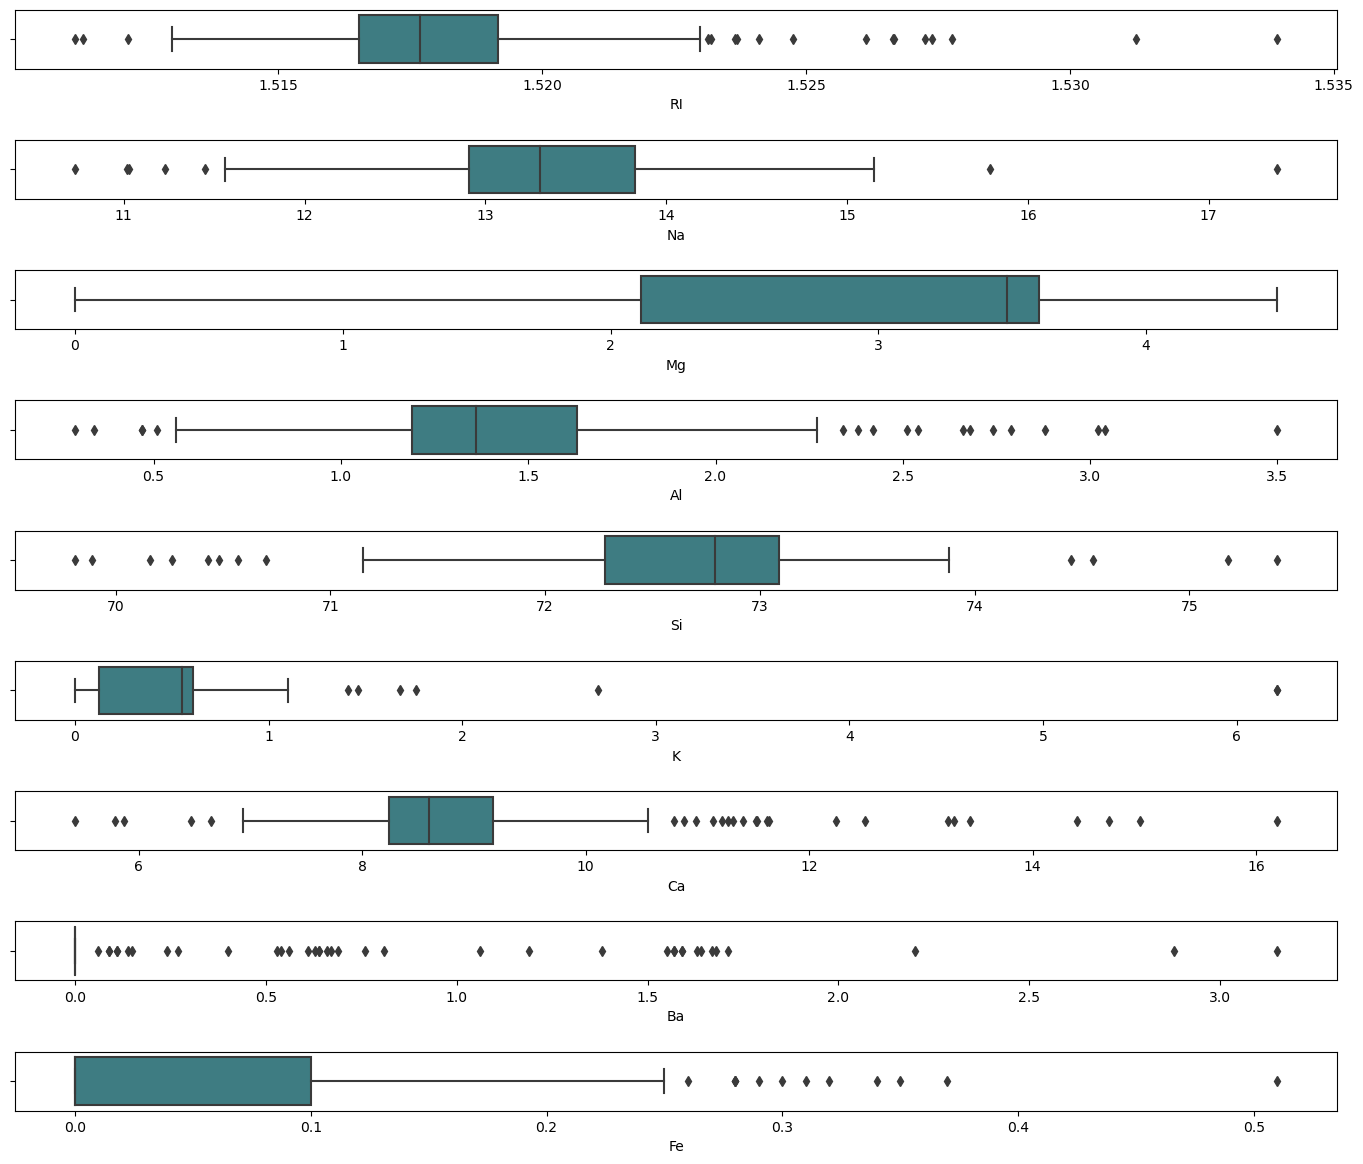

In [76]:
ot=data.copy() 
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)


### so many outliers present into dataset

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\3444013038.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='RI',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='RI'>

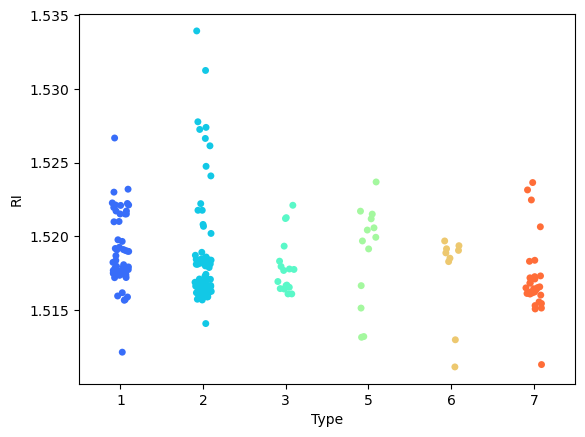

In [77]:
# Visualizing the content of different elements in the various types of glass
sns.stripplot(x='Type',y='RI',data=data,palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\4013352277.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Na',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='Na'>

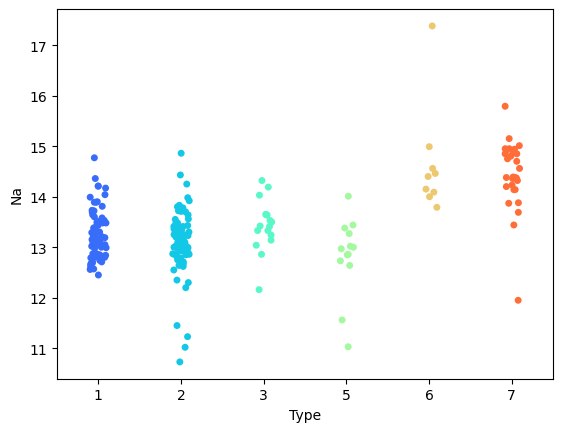

In [78]:
sns.stripplot(x='Type',y='Na',data=data,palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\2149646325.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Mg',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='Mg'>

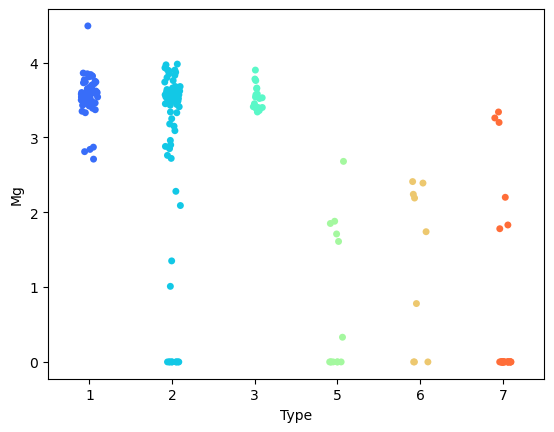

In [79]:
sns.stripplot(x='Type',y='Mg',data=data,palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\3136569535.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Al',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='Al'>

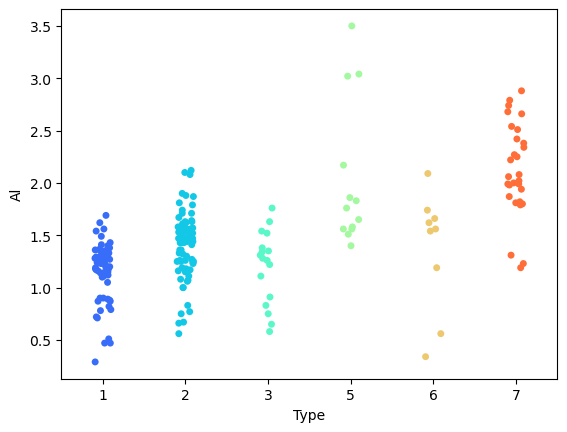

In [80]:
sns.stripplot(x='Type',y='Al',data=data,palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\2681490093.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Si',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='Si'>

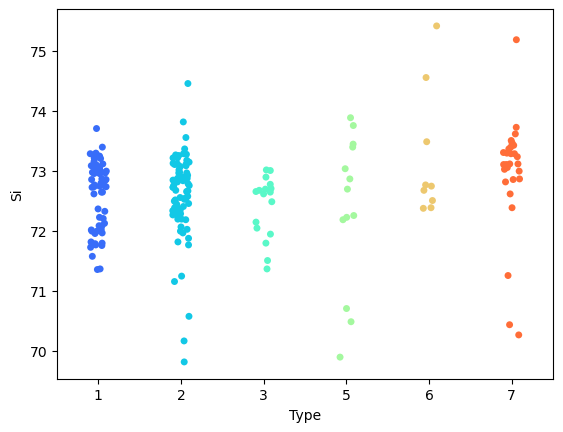

In [81]:
sns.stripplot(x='Type',y='Si',data=data,palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\3033825329.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='K',data=data, palette='rainbow')


<Axes: xlabel='Type', ylabel='K'>

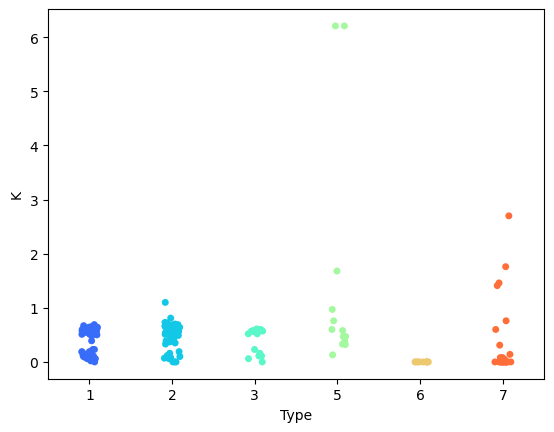

In [82]:
sns.stripplot(x='Type',y='K',data=data, palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\2075842277.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Ca',data=data, palette='rainbow')


<Axes: xlabel='Type', ylabel='Ca'>

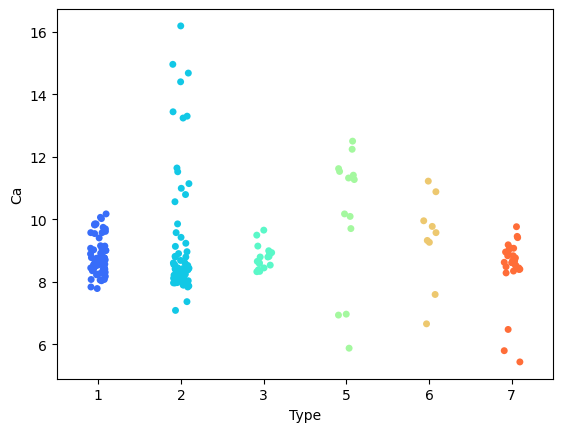

In [83]:
sns.stripplot(x='Type',y='Ca',data=data, palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\2947176566.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Ba',data=data, palette='rainbow')


<Axes: xlabel='Type', ylabel='Ba'>

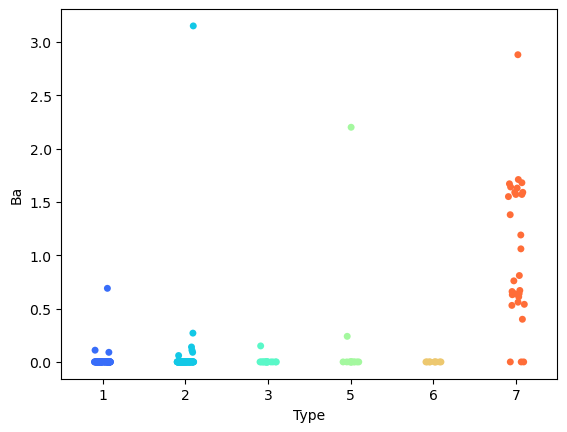

In [84]:
sns.stripplot(x='Type',y='Ba',data=data, palette='rainbow')

C:\Users\shubh\AppData\Local\Temp\ipykernel_25320\30410562.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Type',y='Fe',data=data,palette='rainbow')


<Axes: xlabel='Type', ylabel='Fe'>

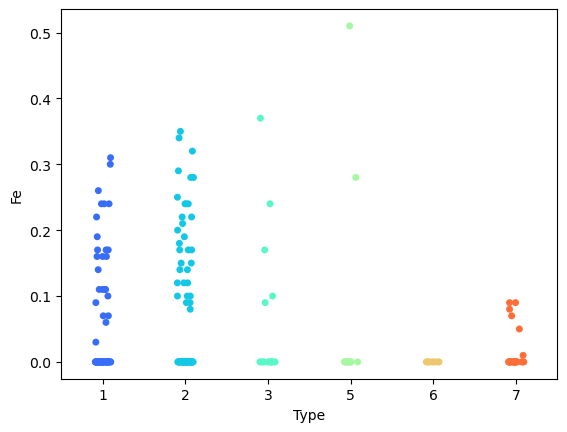

In [85]:
sns.stripplot(x='Type',y='Fe',data=data,palette='rainbow')

## standard scaler

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [87]:
scaler.fit(data.drop('Type',axis=1))

StandardScaler()

In [88]:
scaled_features=scaler.transform(data.drop('Type',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [89]:
data_head

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [90]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['Type'], test_size=0.3, random_state=42)

In [91]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


## Grid search for choosing the best Value of K

In [92]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [93]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [94]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


## Visualizing the CV results

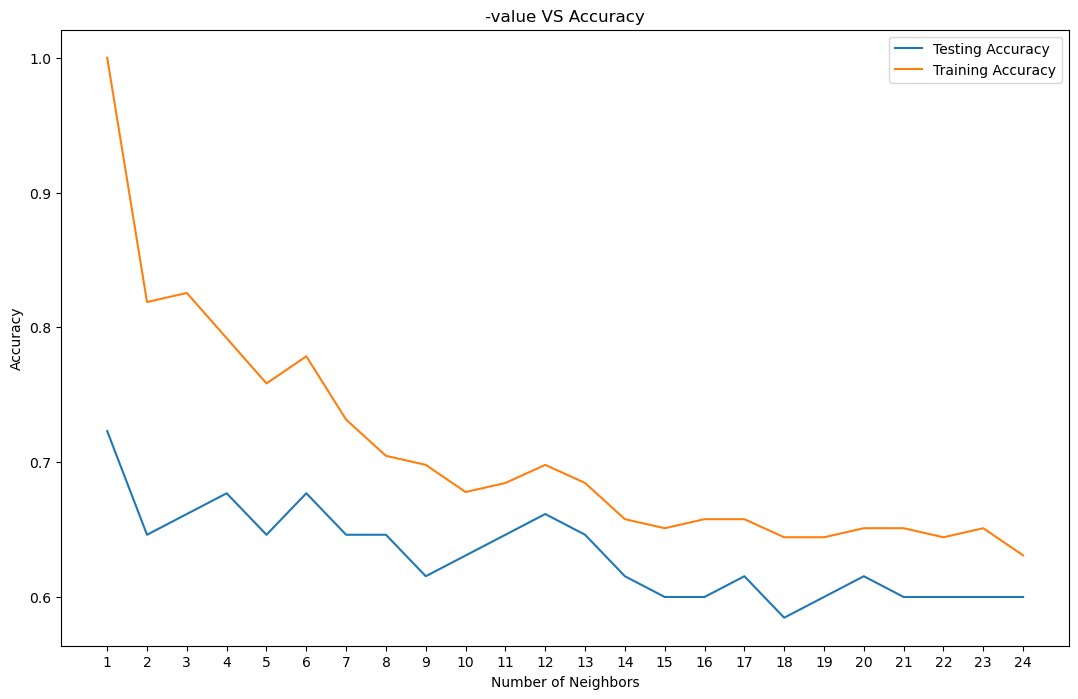

Best accuracy is 0.7230769230769231 with K = 1


In [95]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


# Building KNN model

In [96]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [97]:
pred = model.predict(x_test)

In [98]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 5, 1, 1, 2, 1, 7, 2, 2,
       2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [99]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,2
56,1,1
199,7,7


In [100]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.650952380952381


In [101]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[16  3  0  0  0  0]
 [ 9 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 1  3  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]


In [103]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error_rate')

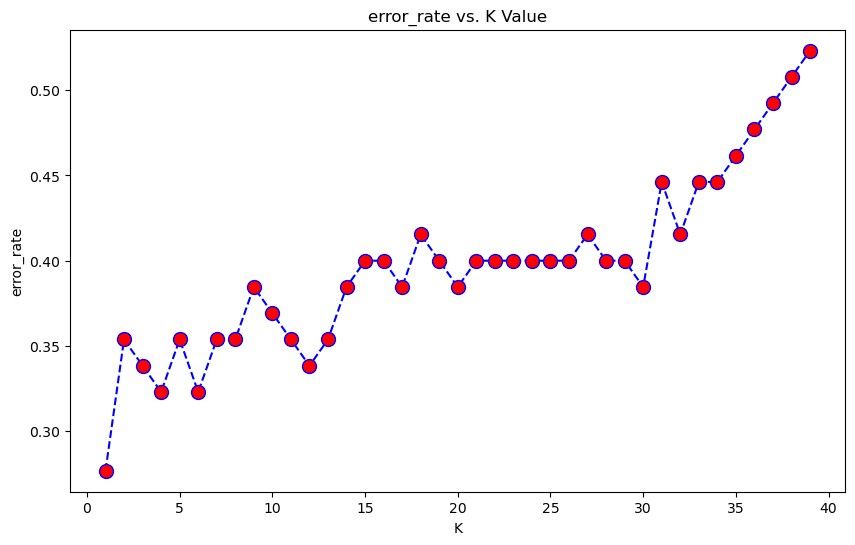

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('error_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error_rate')

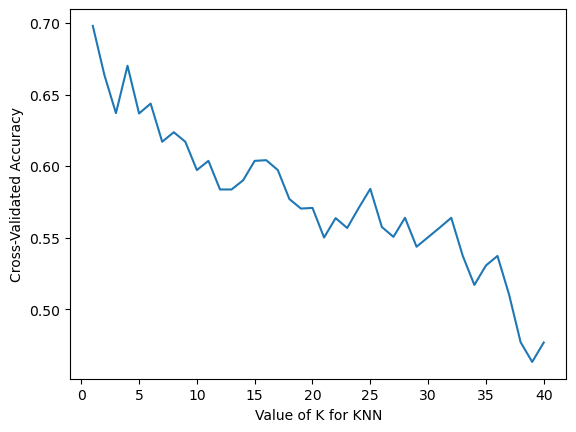

In [105]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### We can see that at K=1 we have low error rate and high value of accuracy. Hence we will perform the test with K=1

In [106]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [107]:
pred=knn.predict(x_test)

In [108]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 6, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 3, 2, 2, 1, 7, 3, 2,
       1, 6, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 1, 2, 1, 7, 2],
      dtype=int64)

In [109]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,1
135,2,2
56,1,1
199,7,7


In [110]:
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())

0.699047619047619


In [111]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



In [112]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[16  2  1  0  0  0]
 [ 6 15  1  0  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


#### We can see that accuracy is improved when K=1

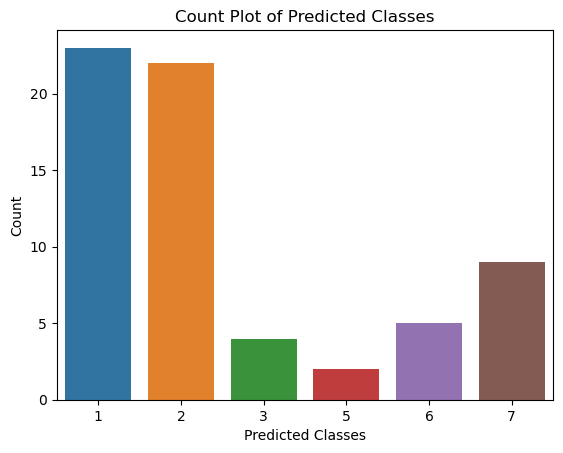

In [113]:
sns.countplot(x=pred)

# Display the plot
plt.title('Count Plot of Predicted Classes')
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.show()